# Note for checking of model

After using the `forward` method for creating predictions, `encoding` method must be performed on the predictions before checking accuracy score.


Example:


predictions = model.forward(x_test_tensor)

predictions = model.encoding(predictions)

print(accuracy_score(y_test_tensor, predictions))


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random
from sklearn.manifold import TSNE
import torch.optim as optim
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

c:\Training\Demo\Python\pytorch training\neuralnet compet\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
magic_df = pd.read_csv("magic04.csv", header=None)

magic_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.296208,0.085816,0.406505,0.106035,0.106831,0.390870,0.657489,0.494704,0.982929,0.553649,-1
1,0.264850,0.073442,0.227203,0.483578,0.506297,0.392227,0.410353,0.489440,0.709816,0.262033,-1
2,0.639720,0.264542,0.443022,0.140016,0.106979,0.732251,0.415194,0.385419,0.854711,0.489160,-1
3,0.472227,0.339511,0.609610,0.091942,0.074826,0.412321,0.285033,0.391743,0.113370,0.589703,-1
4,0.047007,0.075485,0.208368,0.591090,0.396355,0.457517,0.590456,0.509181,0.889363,0.126393,-1
...,...,...,...,...,...,...,...,...,...,...,...
18617,0.210467,0.089468,0.414991,0.219911,0.156023,0.522742,0.688964,0.495537,0.096722,0.438029,1
18618,0.063433,0.054588,0.117741,0.526083,0.355608,0.430602,0.567477,0.502047,0.558220,0.385304,1
18619,0.054826,0.025611,0.054465,0.827935,0.560083,0.418438,0.570193,0.551346,0.353000,0.555916,1
18620,0.093179,0.075923,0.394559,0.359814,0.244184,0.465129,0.628841,0.514169,0.008557,0.379607,1


In [3]:
x_df = magic_df.iloc[:,:10]
x_df

,0,1,2,3,4,5,6,7,8,9
0,0.296208,0.085816,0.406505,0.106035,0.106831,0.390870,0.657489,0.494704,0.982929,0.553649
1,0.264850,0.073442,0.227203,0.483578,0.506297,0.392227,0.410353,0.489440,0.709816,0.262033
2,0.639720,0.264542,0.443022,0.140016,0.106979,0.732251,0.415194,0.385419,0.854711,0.489160
3,0.472227,0.339511,0.609610,0.091942,0.074826,0.412321,0.285033,0.391743,0.113370,0.589703
4,0.047007,0.075485,0.208368,0.591090,0.396355,0.457517,0.590456,0.509181,0.889363,0.126393
...,...,...,...,...,...,...,...,...,...,...
18617,0.210467,0.089468,0.414991,0.219911,0.156023,0.522742,0.688964,0.495537,0.096722,0.438029
18618,0.063433,0.054588,0.117741,0.526083,0.355608,0.430602,0.567477,0.502047,0.558220,0.385304
18619,0.054826,0.025611,0.054465,0.827935,0.560083,0.418438,0.570193,0.551346,0.353000,0.555916
18620,0.093179,0.075923,0.394559,0.359814,0.244184,0.465129,0.628841,0.514169,0.008557,0.379607


In [4]:
y_df = magic_df.iloc[:,10:]
y_df

,10
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
18617,1
18618,1
18619,1
18620,1


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=0)
x_train.shape

(14897, 10)

In [6]:
y_train.value_counts()

10
 1    9559
-1    5338
dtype: int64

# Benchmark 
No feature reduction and no oversampling

In [7]:
x_train_tensor = torch.Tensor(x_train.values)
y_train_tensor = torch.Tensor(y_train.values)

y_train_tensor_training = torch.ones(size = [len(y_train_tensor),1])
for index in range(len(y_train_tensor)):
            if y_train_tensor[index]==-1:
                y_train_tensor_training[index]=0

x_test_tensor = torch.Tensor(x_test.values)
y_test_tensor = torch.Tensor(y_test.values)

print(len(y_train_tensor_training), len(y_train_tensor))

14897 14897


In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 20) # input to first hidden layer
        self.hidden_layer_2 = nn.Linear(20, 10)
        
        self.multiple_layers = nn.Sequential(
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
        )
        
        self.output_layer = nn.Linear(10, self.out_dim)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation(x)
        
        x = self.hidden_layer_2(x)
        x = self.activation(x)
        
        x = self.multiple_layers(x)
        
        y = self.output_layer(x)
        y = self.activation(y)
                 
        return y

    def encoding(self, y):
        y = torch.where(y>0.5,1,-1)

        return y

In [9]:
model = NeuralNetwork(10, 1)

# # Test structure of model
predictions = model.forward(x_train_tensor)

predictions = model.encoding(predictions)

predictions

tensor([[-1],
        [-1],
        [-1],
        ...,
        [-1],
        [-1],
        [-1]])

In [43]:
learning_rate = 0.0001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 30

In [11]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [12]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [44]:
# Dataloader is in charge of:
# - partitioning data into batches
# - optionally shuffling the data
# - run the optimizer against a partition defined by this loader
custom_dataset = MyCustomDataset(x=x_train_tensor, y=y_train_tensor_training)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

epochs = 150
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "magic_model.pth")

Epoch: 0


100%|██████████| 497/497 [00:02<00:00, 171.76it/s, loss=0.187]


Ave Loss: 0.42860361049232826
Epoch: 1


100%|██████████| 497/497 [00:02<00:00, 183.42it/s, loss=0.186]


Ave Loss: 0.22961530943871503
Epoch: 2


100%|██████████| 497/497 [00:02<00:00, 206.55it/s, loss=0.161]


Ave Loss: 0.2094732615609524
Epoch: 3


100%|██████████| 497/497 [00:01<00:00, 250.74it/s, loss=0.169] 


Ave Loss: 0.1642818104483232
Epoch: 4


100%|██████████| 497/497 [00:02<00:00, 239.84it/s, loss=0.174] 


Ave Loss: 0.15955817298420238
Epoch: 5


100%|██████████| 497/497 [00:01<00:00, 269.34it/s, loss=0.175] 


Ave Loss: 0.15838433652966316
Epoch: 6


100%|██████████| 497/497 [00:01<00:00, 251.02it/s, loss=0.175] 


Ave Loss: 0.15752140157509378
Epoch: 7


100%|██████████| 497/497 [00:02<00:00, 240.75it/s, loss=0.173] 


Ave Loss: 0.1567122318015492
Epoch: 8


100%|██████████| 497/497 [00:01<00:00, 253.43it/s, loss=0.169] 


Ave Loss: 0.1558404346886775
Epoch: 9


100%|██████████| 497/497 [00:01<00:00, 260.54it/s, loss=0.164] 


Ave Loss: 0.15484025356335418
Epoch: 10


100%|██████████| 497/497 [00:01<00:00, 253.41it/s, loss=0.158] 


Ave Loss: 0.15375373954744168
Epoch: 11


100%|██████████| 497/497 [00:01<00:00, 251.06it/s, loss=0.154] 


Ave Loss: 0.15269856953195163
Epoch: 12


100%|██████████| 497/497 [00:01<00:00, 258.91it/s, loss=0.151] 


Ave Loss: 0.15171104319528556
Epoch: 13


100%|██████████| 497/497 [00:01<00:00, 273.03it/s, loss=0.148] 


Ave Loss: 0.15073202523427232
Epoch: 14


100%|██████████| 497/497 [00:02<00:00, 231.13it/s, loss=0.145] 


Ave Loss: 0.14967682374495136
Epoch: 15


100%|██████████| 497/497 [00:01<00:00, 266.00it/s, loss=0.144] 


Ave Loss: 0.1484567883538768
Epoch: 16


100%|██████████| 497/497 [00:01<00:00, 257.77it/s, loss=0.143] 


Ave Loss: 0.1470161876837972
Epoch: 17


100%|██████████| 497/497 [00:01<00:00, 259.56it/s, loss=0.142] 


Ave Loss: 0.14538344067017317
Epoch: 18


100%|██████████| 497/497 [00:02<00:00, 230.95it/s, loss=0.142] 


Ave Loss: 0.1436488084809881
Epoch: 19


100%|██████████| 497/497 [00:03<00:00, 142.75it/s, loss=0.141] 


Ave Loss: 0.14190690627910002
Epoch: 20


100%|██████████| 497/497 [00:03<00:00, 138.56it/s, loss=0.141] 


Ave Loss: 0.14023446457336847
Epoch: 21


100%|██████████| 497/497 [00:02<00:00, 175.06it/s, loss=0.141] 


Ave Loss: 0.13868772720457082
Epoch: 22


100%|██████████| 497/497 [00:03<00:00, 160.96it/s, loss=0.142] 


Ave Loss: 0.1372974610529555
Epoch: 23


100%|██████████| 497/497 [00:03<00:00, 145.36it/s, loss=0.142] 


Ave Loss: 0.13606850594522008
Epoch: 24


100%|██████████| 497/497 [00:03<00:00, 137.20it/s, loss=0.143] 


Ave Loss: 0.13498690628429774
Epoch: 25


100%|██████████| 497/497 [00:04<00:00, 105.81it/s, loss=0.143] 


Ave Loss: 0.13402808849630463
Epoch: 26


100%|██████████| 497/497 [00:03<00:00, 140.55it/s, loss=0.144] 


Ave Loss: 0.13316337563382308
Epoch: 27


100%|██████████| 497/497 [00:03<00:00, 162.54it/s, loss=0.144] 


Ave Loss: 0.13236480524812186
Epoch: 28


100%|██████████| 497/497 [00:03<00:00, 162.80it/s, loss=0.145] 


Ave Loss: 0.13160815083195027
Epoch: 29


100%|██████████| 497/497 [00:03<00:00, 139.45it/s, loss=0.145] 


Ave Loss: 0.1308741575065753
Epoch: 30


100%|██████████| 497/497 [00:03<00:00, 150.81it/s, loss=0.146] 


Ave Loss: 0.1301487941722155
Epoch: 31


100%|██████████| 497/497 [00:03<00:00, 143.55it/s, loss=0.147] 


Ave Loss: 0.12942305399888238
Epoch: 32


100%|██████████| 497/497 [00:03<00:00, 160.66it/s, loss=0.148] 


Ave Loss: 0.12869278236593998
Epoch: 33


100%|██████████| 497/497 [00:03<00:00, 163.00it/s, loss=0.149] 


Ave Loss: 0.1279585341130284
Epoch: 34


100%|██████████| 497/497 [00:03<00:00, 158.74it/s, loss=0.151] 


Ave Loss: 0.12722518886074094
Epoch: 35


100%|██████████| 497/497 [00:03<00:00, 146.99it/s, loss=0.152] 


Ave Loss: 0.126500951946981
Epoch: 36


100%|██████████| 497/497 [00:02<00:00, 187.72it/s, loss=0.154] 


Ave Loss: 0.12579555846600826
Epoch: 37


100%|██████████| 497/497 [00:02<00:00, 231.28it/s, loss=0.156] 


Ave Loss: 0.12511817616985837
Epoch: 38


100%|██████████| 497/497 [00:01<00:00, 264.51it/s, loss=0.157] 


Ave Loss: 0.12447582431872126
Epoch: 39


100%|██████████| 497/497 [00:01<00:00, 250.78it/s, loss=0.159] 


Ave Loss: 0.12387289140950626
Epoch: 40


100%|██████████| 497/497 [00:02<00:00, 168.54it/s, loss=0.16]  


Ave Loss: 0.12331153761587992
Epoch: 41


100%|██████████| 497/497 [00:02<00:00, 182.02it/s, loss=0.161] 


Ave Loss: 0.12279236005990198
Epoch: 42


100%|██████████| 497/497 [00:02<00:00, 230.00it/s, loss=0.161] 


Ave Loss: 0.122314944147494
Epoch: 43


100%|██████████| 497/497 [00:01<00:00, 257.62it/s, loss=0.162] 


Ave Loss: 0.1218781569893931
Epoch: 44


100%|██████████| 497/497 [00:01<00:00, 257.15it/s, loss=0.162] 


Ave Loss: 0.12148028033480078
Epoch: 45


100%|██████████| 497/497 [00:01<00:00, 259.42it/s, loss=0.162] 


Ave Loss: 0.12111910254932505
Epoch: 46


100%|██████████| 497/497 [00:02<00:00, 243.08it/s, loss=0.162] 


Ave Loss: 0.1207920192465396
Epoch: 47


100%|██████████| 497/497 [00:01<00:00, 257.62it/s, loss=0.162] 


Ave Loss: 0.12049617959370076
Epoch: 48


100%|██████████| 497/497 [00:01<00:00, 262.10it/s, loss=0.162] 


Ave Loss: 0.12022860020294156
Epoch: 49


100%|██████████| 497/497 [00:01<00:00, 260.03it/s, loss=0.162] 


Ave Loss: 0.11998631978328798
Epoch: 50


100%|██████████| 497/497 [00:01<00:00, 267.48it/s, loss=0.162] 


Ave Loss: 0.11976648785428742
Epoch: 51


100%|██████████| 497/497 [00:01<00:00, 251.74it/s, loss=0.161] 


Ave Loss: 0.11956644843386813
Epoch: 52


100%|██████████| 497/497 [00:01<00:00, 257.42it/s, loss=0.161] 


Ave Loss: 0.11938377541735379
Epoch: 53


100%|██████████| 497/497 [00:01<00:00, 254.08it/s, loss=0.161] 


Ave Loss: 0.11921630647610611
Epoch: 54


100%|██████████| 497/497 [00:02<00:00, 241.13it/s, loss=0.16]  


Ave Loss: 0.11906212445730774
Epoch: 55


100%|██████████| 497/497 [00:01<00:00, 264.32it/s, loss=0.16]  


Ave Loss: 0.11891956271704894
Epoch: 56


100%|██████████| 497/497 [00:01<00:00, 249.55it/s, loss=0.16]  


Ave Loss: 0.1187871795642364
Epoch: 57


100%|██████████| 497/497 [00:01<00:00, 251.92it/s, loss=0.159] 


Ave Loss: 0.11866373478077068
Epoch: 58


100%|██████████| 497/497 [00:01<00:00, 262.10it/s, loss=0.159] 


Ave Loss: 0.11854816278371533
Epoch: 59


100%|██████████| 497/497 [00:02<00:00, 227.39it/s, loss=0.158] 


Ave Loss: 0.11843953140349815
Epoch: 60


100%|██████████| 497/497 [00:01<00:00, 275.63it/s, loss=0.158] 


Ave Loss: 0.11833706179585016
Epoch: 61


100%|██████████| 497/497 [00:01<00:00, 260.37it/s, loss=0.158] 


Ave Loss: 0.11824006895708966
Epoch: 62


100%|██████████| 497/497 [00:01<00:00, 256.91it/s, loss=0.157] 


Ave Loss: 0.11814796034119258
Epoch: 63


100%|██████████| 497/497 [00:01<00:00, 280.22it/s, loss=0.157] 


Ave Loss: 0.11806023372730738
Epoch: 64


100%|██████████| 497/497 [00:02<00:00, 237.89it/s, loss=0.157] 


Ave Loss: 0.1179764389624478
Epoch: 65


100%|██████████| 497/497 [00:02<00:00, 228.93it/s, loss=0.156] 


Ave Loss: 0.11789619591709234
Epoch: 66


100%|██████████| 497/497 [00:01<00:00, 256.44it/s, loss=0.156] 


Ave Loss: 0.11781916100629258
Epoch: 67


100%|██████████| 497/497 [00:01<00:00, 257.12it/s, loss=0.156] 


Ave Loss: 0.11774504015698159
Epoch: 68


100%|██████████| 497/497 [00:01<00:00, 281.83it/s, loss=0.155] 


Ave Loss: 0.11767357094606883
Epoch: 69


100%|██████████| 497/497 [00:01<00:00, 252.90it/s, loss=0.155] 


Ave Loss: 0.11760452118003273
Epoch: 70


100%|██████████| 497/497 [00:01<00:00, 254.03it/s, loss=0.155] 


Ave Loss: 0.11753768762817206
Epoch: 71


100%|██████████| 497/497 [00:02<00:00, 242.28it/s, loss=0.154] 


Ave Loss: 0.11747288925412075
Epoch: 72


100%|██████████| 497/497 [00:02<00:00, 248.27it/s, loss=0.154] 


Ave Loss: 0.11740995992267396
Epoch: 73


100%|██████████| 497/497 [00:01<00:00, 264.37it/s, loss=0.154] 


Ave Loss: 0.11734875582788191
Epoch: 74


100%|██████████| 497/497 [00:01<00:00, 256.92it/s, loss=0.153] 


Ave Loss: 0.1172891487470515
Epoch: 75


100%|██████████| 497/497 [00:01<00:00, 259.71it/s, loss=0.153] 


Ave Loss: 0.11723101405910323
Epoch: 76


100%|██████████| 497/497 [00:01<00:00, 265.06it/s, loss=0.153] 


Ave Loss: 0.11717424662015448
Epoch: 77


100%|██████████| 497/497 [00:01<00:00, 260.48it/s, loss=0.153] 


Ave Loss: 0.11711875088437942
Epoch: 78


100%|██████████| 497/497 [00:01<00:00, 264.56it/s, loss=0.152] 


Ave Loss: 0.11706443387692723
Epoch: 79


100%|██████████| 497/497 [00:02<00:00, 231.43it/s, loss=0.152] 


Ave Loss: 0.11701122475357002
Epoch: 80


100%|██████████| 497/497 [00:01<00:00, 260.62it/s, loss=0.152] 


Ave Loss: 0.11695903839854527
Epoch: 81


100%|██████████| 497/497 [00:01<00:00, 276.56it/s, loss=0.152] 


Ave Loss: 0.1169078112682946
Epoch: 82


100%|██████████| 497/497 [00:01<00:00, 258.09it/s, loss=0.151] 


Ave Loss: 0.11685747600027493
Epoch: 83


100%|██████████| 497/497 [00:01<00:00, 260.10it/s, loss=0.151] 


Ave Loss: 0.11680797769330158
Epoch: 84


100%|██████████| 497/497 [00:01<00:00, 254.52it/s, loss=0.151] 


Ave Loss: 0.11675925332850494
Epoch: 85


100%|██████████| 497/497 [00:01<00:00, 259.00it/s, loss=0.151] 


Ave Loss: 0.11671126022245323
Epoch: 86


100%|██████████| 497/497 [00:01<00:00, 275.81it/s, loss=0.151] 


Ave Loss: 0.11666394313291405
Epoch: 87


100%|██████████| 497/497 [00:01<00:00, 250.27it/s, loss=0.15]  


Ave Loss: 0.11661725993862214
Epoch: 88


100%|██████████| 497/497 [00:01<00:00, 260.17it/s, loss=0.15]  


Ave Loss: 0.11657116518279076
Epoch: 89


100%|██████████| 497/497 [00:01<00:00, 252.56it/s, loss=0.15]  


Ave Loss: 0.11652561605081592
Epoch: 90


100%|██████████| 497/497 [00:02<00:00, 215.31it/s, loss=0.15]  


Ave Loss: 0.11648057434160705
Epoch: 91


100%|██████████| 497/497 [00:02<00:00, 190.08it/s, loss=0.149] 


Ave Loss: 0.11643600400529756
Epoch: 92


100%|██████████| 497/497 [00:03<00:00, 161.50it/s, loss=0.149] 


Ave Loss: 0.1163918673992157
Epoch: 93


100%|██████████| 497/497 [00:02<00:00, 226.42it/s, loss=0.149] 


Ave Loss: 0.11634813392651033
Epoch: 94


100%|██████████| 497/497 [00:02<00:00, 241.45it/s, loss=0.149] 


Ave Loss: 0.11630476562594863
Epoch: 95


100%|██████████| 497/497 [00:02<00:00, 216.03it/s, loss=0.149] 


Ave Loss: 0.11626173366588247
Epoch: 96


100%|██████████| 497/497 [00:02<00:00, 207.42it/s, loss=0.149] 


Ave Loss: 0.11621900466111464
Epoch: 97


100%|██████████| 497/497 [00:02<00:00, 192.78it/s, loss=0.148] 


Ave Loss: 0.11617655076191459
Epoch: 98


100%|██████████| 497/497 [00:03<00:00, 164.27it/s, loss=0.148] 


Ave Loss: 0.11613434445210385
Epoch: 99


100%|██████████| 497/497 [00:03<00:00, 161.25it/s, loss=0.148] 


Ave Loss: 0.1160923539392905
Epoch: 100


100%|██████████| 497/497 [00:02<00:00, 178.00it/s, loss=0.148] 


Ave Loss: 0.1160505543382355
Epoch: 101


100%|██████████| 497/497 [00:02<00:00, 200.37it/s, loss=0.148] 


Ave Loss: 0.1160089210447831
Epoch: 102


100%|██████████| 497/497 [00:02<00:00, 233.90it/s, loss=0.148] 


Ave Loss: 0.11596742610801274
Epoch: 103


100%|██████████| 497/497 [00:02<00:00, 214.49it/s, loss=0.147] 


Ave Loss: 0.11592604085743068
Epoch: 104


100%|██████████| 497/497 [00:01<00:00, 264.99it/s, loss=0.147] 


Ave Loss: 0.11588474640424103
Epoch: 105


100%|██████████| 497/497 [00:01<00:00, 267.55it/s, loss=0.147] 


Ave Loss: 0.11584351392803897
Epoch: 106


100%|██████████| 497/497 [00:01<00:00, 266.38it/s, loss=0.147] 


Ave Loss: 0.11580232355811107
Epoch: 107


100%|██████████| 497/497 [00:02<00:00, 242.01it/s, loss=0.147] 


Ave Loss: 0.11576113955565621
Epoch: 108


100%|██████████| 497/497 [00:01<00:00, 262.79it/s, loss=0.147] 


Ave Loss: 0.11571995590174462
Epoch: 109


100%|██████████| 497/497 [00:02<00:00, 240.54it/s, loss=0.146] 


Ave Loss: 0.11567873548588882
Epoch: 110


100%|██████████| 497/497 [00:01<00:00, 264.36it/s, loss=0.146] 


Ave Loss: 0.11563745799888547
Epoch: 111


100%|██████████| 497/497 [00:01<00:00, 254.51it/s, loss=0.146] 


Ave Loss: 0.1155961061447439
Epoch: 112


100%|██████████| 497/497 [00:02<00:00, 247.46it/s, loss=0.146] 


Ave Loss: 0.115554646823098
Epoch: 113


100%|██████████| 497/497 [00:01<00:00, 265.28it/s, loss=0.146] 


Ave Loss: 0.11551306370113577
Epoch: 114


100%|██████████| 497/497 [00:02<00:00, 243.09it/s, loss=0.146] 


Ave Loss: 0.11547132987731419
Epoch: 115


100%|██████████| 497/497 [00:01<00:00, 248.62it/s, loss=0.146] 


Ave Loss: 0.11542942837045586
Epoch: 116


100%|██████████| 497/497 [00:01<00:00, 256.51it/s, loss=0.146] 


Ave Loss: 0.11538732730196995
Epoch: 117


100%|██████████| 497/497 [00:01<00:00, 254.26it/s, loss=0.145] 


Ave Loss: 0.11534501116730318
Epoch: 118


100%|██████████| 497/497 [00:01<00:00, 274.11it/s, loss=0.145] 


Ave Loss: 0.1153024532148236
Epoch: 119


100%|██████████| 497/497 [00:02<00:00, 245.63it/s, loss=0.145] 


Ave Loss: 0.11525963958150424
Epoch: 120


100%|██████████| 497/497 [00:01<00:00, 275.56it/s, loss=0.145] 


Ave Loss: 0.11521653610261033
Epoch: 121


100%|██████████| 497/497 [00:02<00:00, 245.07it/s, loss=0.145] 


Ave Loss: 0.11517312945479478
Epoch: 122


100%|██████████| 497/497 [00:02<00:00, 227.41it/s, loss=0.145] 


Ave Loss: 0.11512939296512896
Epoch: 123


100%|██████████| 497/497 [00:01<00:00, 259.14it/s, loss=0.145] 


Ave Loss: 0.11508530556735858
Epoch: 124


100%|██████████| 497/497 [00:02<00:00, 241.37it/s, loss=0.145] 


Ave Loss: 0.11504084833520999
Epoch: 125


100%|██████████| 497/497 [00:01<00:00, 271.33it/s, loss=0.144] 


Ave Loss: 0.1149959990143836
Epoch: 126


100%|██████████| 497/497 [00:01<00:00, 252.04it/s, loss=0.144] 


Ave Loss: 0.11495073670352729
Epoch: 127


100%|██████████| 497/497 [00:01<00:00, 252.16it/s, loss=0.144] 


Ave Loss: 0.11490504047505452
Epoch: 128


100%|██████████| 497/497 [00:01<00:00, 279.39it/s, loss=0.144] 


Ave Loss: 0.11485889136146611
Epoch: 129


100%|██████████| 497/497 [00:01<00:00, 258.53it/s, loss=0.144] 


Ave Loss: 0.1148122697394019
Epoch: 130


100%|██████████| 497/497 [00:01<00:00, 254.64it/s, loss=0.144] 


Ave Loss: 0.11476515939223095
Epoch: 131


100%|██████████| 497/497 [00:01<00:00, 260.23it/s, loss=0.144] 


Ave Loss: 0.11471753748849604
Epoch: 132


100%|██████████| 497/497 [00:01<00:00, 253.49it/s, loss=0.144] 


Ave Loss: 0.11466938891341269
Epoch: 133


100%|██████████| 497/497 [00:01<00:00, 255.80it/s, loss=0.144] 


Ave Loss: 0.11462070043358046
Epoch: 134


100%|██████████| 497/497 [00:01<00:00, 250.82it/s, loss=0.144] 


Ave Loss: 0.11457144911260432
Epoch: 135


100%|██████████| 497/497 [00:01<00:00, 252.67it/s, loss=0.144] 


Ave Loss: 0.1145216237596223
Epoch: 136


100%|██████████| 497/497 [00:02<00:00, 231.99it/s, loss=0.143] 


Ave Loss: 0.1144712152150675
Epoch: 137


100%|██████████| 497/497 [00:01<00:00, 255.83it/s, loss=0.143] 


Ave Loss: 0.11442020177556356
Epoch: 138


100%|██████████| 497/497 [00:01<00:00, 269.50it/s, loss=0.143] 


Ave Loss: 0.1143685781942227
Epoch: 139


100%|██████████| 497/497 [00:02<00:00, 244.04it/s, loss=0.143] 


Ave Loss: 0.11431633154496221
Epoch: 140


100%|██████████| 497/497 [00:01<00:00, 253.50it/s, loss=0.143] 


Ave Loss: 0.11426344782233958
Epoch: 141


100%|██████████| 497/497 [00:01<00:00, 274.75it/s, loss=0.143] 


Ave Loss: 0.11420992075632395
Epoch: 142


100%|██████████| 497/497 [00:02<00:00, 178.63it/s, loss=0.143] 


Ave Loss: 0.11415574360466459
Epoch: 143


100%|██████████| 497/497 [00:02<00:00, 186.13it/s, loss=0.143] 


Ave Loss: 0.11410090859447207
Epoch: 144


100%|██████████| 497/497 [00:02<00:00, 176.88it/s, loss=0.143] 


Ave Loss: 0.11404541755466154
Epoch: 145


100%|██████████| 497/497 [00:02<00:00, 170.64it/s, loss=0.143] 


Ave Loss: 0.1139892577502869
Epoch: 146


100%|██████████| 497/497 [00:02<00:00, 181.45it/s, loss=0.143] 


Ave Loss: 0.11393243234447191
Epoch: 147


100%|██████████| 497/497 [00:02<00:00, 177.95it/s, loss=0.143] 


Ave Loss: 0.11387494382199267
Epoch: 148


100%|██████████| 497/497 [00:02<00:00, 179.07it/s, loss=0.142] 


Ave Loss: 0.11381679123840942
Epoch: 149


100%|██████████| 497/497 [00:02<00:00, 185.36it/s, loss=0.142] 

Ave Loss: 0.11375797955577882


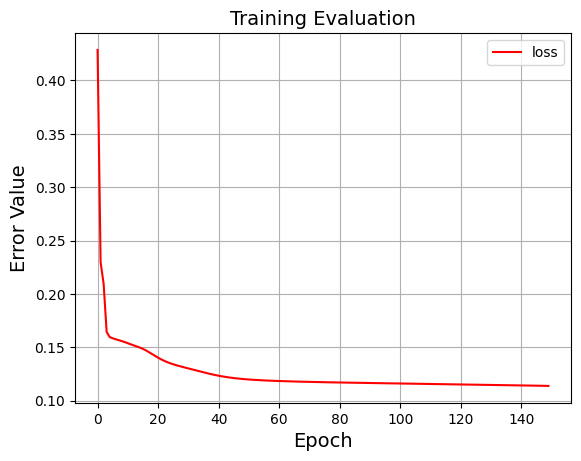

In [45]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [46]:
predictions = model.forward(x_train_tensor)

predictions = model.encoding(predictions)

print(accuracy_score(y_train_tensor, predictions))

0.8445324561992348


In [47]:
predictions = model.forward(x_test_tensor)

predictions = model.encoding(predictions)

print(accuracy_score(y_test_tensor, predictions))

0.8410738255033557


# With variaional autoencoder
oversampling

In [17]:
y_train.value_counts()

10
 1    9559
-1    5338
dtype: int64

In [18]:
y_train_minority = y_train[y_train[10] == -1]
y_train_minority.head()

,10
1308,-1
5538,-1
4493,-1
5501,-1
5495,-1


In [19]:
x_train_minority = x_train.loc[y_train_minority.index]
x_train_minority.head()

,0,1,2,3,4,5,6,7,8,9
1308,0.075346,0.017208,0.174630,0.587112,0.463032,0.449844,0.534825,0.508178,0.592346,0.408468
5538,0.112857,0.147325,0.365435,0.183885,0.142836,0.472588,0.630100,0.490879,0.290611,0.441778
4493,0.356389,0.143694,0.416174,0.144903,0.111424,0.382542,0.420303,0.619924,0.118067,0.611751
5501,0.345057,0.109210,0.256653,0.377997,0.319751,0.311050,0.752703,0.597500,0.086159,0.587085
5495,0.038380,0.053937,0.092608,0.579043,0.438287,0.431102,0.575110,0.543244,0.626747,0.405561


In [20]:
y_train_majority = y_train[y_train[10] == 1]
y_train_majority.head()

,10
11504,1
6651,1
18363,1
7682,1
16320,1


In [21]:
x_train_majority = x_train.loc[y_train_majority.index]
x_train_majority.head()

,0,1,2,3,4,5,6,7,8,9
11504,0.088786,0.070205,0.174690,0.429026,0.332494,0.399651,0.624580,0.523343,0.048108,0.386714
6651,0.247853,0.085141,0.419101,0.254347,0.245814,0.386322,0.683390,0.484997,0.022278,0.609516
18363,0.070953,0.058683,0.206446,0.399591,0.310565,0.458541,0.598499,0.556111,0.322097,0.357253
7682,0.071720,0.046081,0.167918,0.541084,0.419321,0.418613,0.539191,0.555051,0.351466,0.237268
16320,0.109650,0.065622,0.215523,0.410047,0.346274,0.429231,0.543243,0.563757,0.207756,0.288156


In [22]:
# Source: https://debuggercafe.com/getting-started-with-variational-autoencoder-using-pytorch/
class VariationalAutoencoder(nn.Module):
    def __init__(self, num_features=2, num_dim=30):
        super(VariationalAutoencoder, self).__init__()
        
        self.num_features = num_features
        self.num_dim = num_dim
        
        self.encoder_layer_1 = nn.Linear(in_features=self.num_dim, out_features=512)
        self.encoder_layer_2 = nn.Linear(in_features=512, out_features=(self.num_features * 2))
        
        self.decoder_layer_1 = nn.Linear(in_features=self.num_features, out_features=512)
        self.decoder_layer_2 = nn.Linear(in_features=512, out_features=self.num_dim)
        
        self.relu = nn.ReLU() # hidden layers
        self.sigmoid = nn.Sigmoid() # output layer
        
    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std)  # `randn_like` as we need the same size
        sample = mu + (eps * std)    # sampling as if coming from the input space
        
        return sample
    
    def encode(self, x):
        # encoding
        #x = F.relu(self.encoder_layer_1(x))
        x = self.encoder_layer_1(x)
        x = self.relu(x)
        x = self.encoder_layer_2(x).view(-1, 2, self.num_features)
        
        # get `mu` and `log_var`
        mu = x[:, 0, :] # the first feature values as mean
        log_var = x[:, 1, :] # the other feature values as variance
        
        # get the latent vector through reparameterization
        z = self.reparameterize(mu, log_var)
        
        return z, mu, log_var
    
    def decode(self, z, mu, log_var):
        # decoding
        #x = F.relu(self.decoder_layer_1(z))
        x = self.decoder_layer_1(z)
        x = self.relu(x)
        
        #reconstruction = torch.sigmoid(self.decoder_layer_2(x))
        reconstruction = self.decoder_layer_2(x)
        reconstruction = self.sigmoid(reconstruction)
        
        return reconstruction, mu, log_var
    
    # Utility function to generate new data based on:
    # mu: The average that you want to have (should be the same size as num_features)
    # log_var: The variance that you want to have (should be the same size as num_features)
    def sample(self, mu, log_var):
        z = self.reparameterize(mu, log_var)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction
        
    
    def forward(self, x):
        
        z, mu, log_var = self.encode(x)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction, mu, log_var

In [23]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class AutoencoderDataset(Dataset):
    def __init__(self, x):
        self.x = x
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.x[index]

In [24]:
# The final loss is a combination of the reconstruction loss (first argument) and the loss from an assumed distribution (i.e. Normal / Gaussian distribution)
def final_loss(bce_loss, mu, logvar):
    """
    This function will add the reconstruction loss (BCELoss) and the 
    KL-Divergence.
    KL-Divergence = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param bce_loss: recontruction loss
    :param mu: the mean from the latent vector
    :param logvar: log variance from the latent vector
    """
    BCE = bce_loss 
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [25]:
num_features = 1
num_dim=10
model = VariationalAutoencoder(num_features=num_features, num_dim=num_dim)

In [26]:
learning_rate = 0.001
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size =50

In [27]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn_ve(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        reconstruction, mu, logvar = model.forward(data)
        
        loss = loss_fn(reconstruction, targets)
        
        loss = final_loss(loss, mu, logvar)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [28]:
x_train_minority_tensor = torch.Tensor(x_train_minority.values)
y_train_minority_tensor = torch.Tensor(y_train_minority.values)

In [29]:
# use Dataloader for Autoencoder 
custom_dataset = AutoencoderDataset(x_train_minority_tensor)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [30]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn_ve(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "magic_ve.pth")

Epoch: 0


100%|██████████| 107/107 [00:00<00:00, 159.54it/s, loss=0.614]


Ave Loss: 0.6391003538514967
Epoch: 1


100%|██████████| 107/107 [00:00<00:00, 146.87it/s, loss=0.612]


Ave Loss: 0.6186723686824335
Epoch: 2


100%|██████████| 107/107 [00:00<00:00, 135.78it/s, loss=0.613]


Ave Loss: 0.6183640956878662
Epoch: 3


100%|██████████| 107/107 [00:00<00:00, 144.34it/s, loss=0.613]


Ave Loss: 0.6183229890939231
Epoch: 4


100%|██████████| 107/107 [00:00<00:00, 138.54it/s, loss=0.613]


Ave Loss: 0.6183248268109616
Epoch: 5


100%|██████████| 107/107 [00:00<00:00, 145.44it/s, loss=0.614]


Ave Loss: 0.6185215265951424
Epoch: 6


100%|██████████| 107/107 [00:00<00:00, 165.30it/s, loss=0.612]


Ave Loss: 0.6185371613948145
Epoch: 7


100%|██████████| 107/107 [00:00<00:00, 171.66it/s, loss=0.612]


Ave Loss: 0.6185409471253368
Epoch: 8


100%|██████████| 107/107 [00:00<00:00, 149.58it/s, loss=0.613]


Ave Loss: 0.6182957636975797
Epoch: 9


100%|██████████| 107/107 [00:00<00:00, 162.22it/s, loss=0.613]


Ave Loss: 0.6182234632634671
Epoch: 10


100%|██████████| 107/107 [00:00<00:00, 168.28it/s, loss=0.612]


Ave Loss: 0.6182667986254826
Epoch: 11


100%|██████████| 107/107 [00:00<00:00, 142.34it/s, loss=0.613]


Ave Loss: 0.6183763018278318
Epoch: 12


100%|██████████| 107/107 [00:00<00:00, 153.76it/s, loss=0.612]


Ave Loss: 0.618129597089001
Epoch: 13


100%|██████████| 107/107 [00:00<00:00, 143.39it/s, loss=0.612]


Ave Loss: 0.6181862928042902
Epoch: 14


100%|██████████| 107/107 [00:00<00:00, 155.87it/s, loss=0.612]


Ave Loss: 0.6182292148331615
Epoch: 15


100%|██████████| 107/107 [00:00<00:00, 158.44it/s, loss=0.613]


Ave Loss: 0.6182457047088123
Epoch: 16


100%|██████████| 107/107 [00:00<00:00, 146.70it/s, loss=0.612]


Ave Loss: 0.61832211897752
Epoch: 17


100%|██████████| 107/107 [00:00<00:00, 145.03it/s, loss=0.612]


Ave Loss: 0.6184210805135353
Epoch: 18


100%|██████████| 107/107 [00:00<00:00, 140.27it/s, loss=0.612]


Ave Loss: 0.6183218889147322
Epoch: 19


100%|██████████| 107/107 [00:00<00:00, 156.01it/s, loss=0.612]


Ave Loss: 0.6183167478748571
Epoch: 20


100%|██████████| 107/107 [00:00<00:00, 154.34it/s, loss=0.612]


Ave Loss: 0.618340015411377
Epoch: 21


100%|██████████| 107/107 [00:00<00:00, 147.45it/s, loss=0.613]


Ave Loss: 0.6183439186800306
Epoch: 22


100%|██████████| 107/107 [00:00<00:00, 121.22it/s, loss=0.613]


Ave Loss: 0.6181931774192881
Epoch: 23


100%|██████████| 107/107 [00:00<00:00, 137.56it/s, loss=0.612]


Ave Loss: 0.6181325600526043
Epoch: 24


100%|██████████| 107/107 [00:00<00:00, 135.93it/s, loss=0.613]


Ave Loss: 0.6182442240625898
Epoch: 25


100%|██████████| 107/107 [00:00<00:00, 139.75it/s, loss=0.612]


Ave Loss: 0.6181608315940216
Epoch: 26


100%|██████████| 107/107 [00:00<00:00, 168.04it/s, loss=0.612]


Ave Loss: 0.6182022467951909
Epoch: 27


100%|██████████| 107/107 [00:00<00:00, 157.36it/s, loss=0.612]


Ave Loss: 0.6181384625835954
Epoch: 28


100%|██████████| 107/107 [00:00<00:00, 173.68it/s, loss=0.613]


Ave Loss: 0.6180720518682604
Epoch: 29


100%|██████████| 107/107 [00:00<00:00, 137.72it/s, loss=0.613]


Ave Loss: 0.6182285887058651
Epoch: 30


100%|██████████| 107/107 [00:00<00:00, 165.68it/s, loss=0.613]


Ave Loss: 0.618183638447913
Epoch: 31


100%|██████████| 107/107 [00:00<00:00, 149.42it/s, loss=0.613]


Ave Loss: 0.6181038579094076
Epoch: 32


100%|██████████| 107/107 [00:00<00:00, 167.72it/s, loss=0.612]


Ave Loss: 0.6181334034304753
Epoch: 33


100%|██████████| 107/107 [00:00<00:00, 171.05it/s, loss=0.612]


Ave Loss: 0.6182311244100054
Epoch: 34


100%|██████████| 107/107 [00:00<00:00, 169.36it/s, loss=0.613]


Ave Loss: 0.6180985141023297
Epoch: 35


100%|██████████| 107/107 [00:00<00:00, 174.86it/s, loss=0.613]


Ave Loss: 0.6181356416684445
Epoch: 36


100%|██████████| 107/107 [00:00<00:00, 175.36it/s, loss=0.612]


Ave Loss: 0.618182274782769
Epoch: 37


100%|██████████| 107/107 [00:00<00:00, 154.24it/s, loss=0.613]


Ave Loss: 0.6181630235966121
Epoch: 38


100%|██████████| 107/107 [00:00<00:00, 171.09it/s, loss=0.611]


Ave Loss: 0.6179188757299263
Epoch: 39


100%|██████████| 107/107 [00:00<00:00, 133.96it/s, loss=0.613]


Ave Loss: 0.6181218958346644
Epoch: 40


100%|██████████| 107/107 [00:00<00:00, 161.89it/s, loss=0.612]


Ave Loss: 0.618039787372696
Epoch: 41


100%|██████████| 107/107 [00:00<00:00, 171.41it/s, loss=0.611]


Ave Loss: 0.6181408489975974
Epoch: 42


100%|██████████| 107/107 [00:00<00:00, 173.46it/s, loss=0.612]


Ave Loss: 0.6180619530588667
Epoch: 43


100%|██████████| 107/107 [00:00<00:00, 175.28it/s, loss=0.612]


Ave Loss: 0.6180773149026888
Epoch: 44


100%|██████████| 107/107 [00:00<00:00, 151.70it/s, loss=0.613]


Ave Loss: 0.6180739168808839
Epoch: 45


100%|██████████| 107/107 [00:00<00:00, 173.75it/s, loss=0.612]


Ave Loss: 0.618118405342102
Epoch: 46


100%|██████████| 107/107 [00:00<00:00, 162.61it/s, loss=0.612]


Ave Loss: 0.618120869186437
Epoch: 47


100%|██████████| 107/107 [00:00<00:00, 169.72it/s, loss=0.612]


Ave Loss: 0.6181541135377973
Epoch: 48


100%|██████████| 107/107 [00:00<00:00, 175.83it/s, loss=0.614]


Ave Loss: 0.6180053275322246
Epoch: 49


100%|██████████| 107/107 [00:00<00:00, 176.24it/s, loss=0.612]


Ave Loss: 0.6178565359561243
Epoch: 50


100%|██████████| 107/107 [00:00<00:00, 176.79it/s, loss=0.613]


Ave Loss: 0.617946634782809
Epoch: 51


100%|██████████| 107/107 [00:00<00:00, 171.82it/s, loss=0.612]


Ave Loss: 0.6179414218831285
Epoch: 52


100%|██████████| 107/107 [00:00<00:00, 158.37it/s, loss=0.612]


Ave Loss: 0.6179386304917737
Epoch: 53


100%|██████████| 107/107 [00:00<00:00, 171.64it/s, loss=0.614]


Ave Loss: 0.6179509658679784
Epoch: 54


100%|██████████| 107/107 [00:00<00:00, 172.46it/s, loss=0.612]


Ave Loss: 0.6179736696671103
Epoch: 55


100%|██████████| 107/107 [00:00<00:00, 169.36it/s, loss=0.613]


Ave Loss: 0.6180930271326939
Epoch: 56


100%|██████████| 107/107 [00:00<00:00, 176.39it/s, loss=0.612]


Ave Loss: 0.6179395902936704
Epoch: 57


100%|██████████| 107/107 [00:00<00:00, 171.23it/s, loss=0.612]


Ave Loss: 0.6178678129320947
Epoch: 58


100%|██████████| 107/107 [00:00<00:00, 162.47it/s, loss=0.613]


Ave Loss: 0.6177614481649666
Epoch: 59


100%|██████████| 107/107 [00:00<00:00, 164.34it/s, loss=0.61] 


Ave Loss: 0.6177942167932742
Epoch: 60


100%|██████████| 107/107 [00:00<00:00, 140.30it/s, loss=0.611]


Ave Loss: 0.6180423007947262
Epoch: 61


100%|██████████| 107/107 [00:00<00:00, 142.31it/s, loss=0.612]


Ave Loss: 0.6179233210109104
Epoch: 62


100%|██████████| 107/107 [00:01<00:00, 103.85it/s, loss=0.612]


Ave Loss: 0.6177678080362694
Epoch: 63


100%|██████████| 107/107 [00:00<00:00, 109.53it/s, loss=0.612]


Ave Loss: 0.6178672670203949
Epoch: 64


100%|██████████| 107/107 [00:00<00:00, 123.47it/s, loss=0.612]


Ave Loss: 0.6178259253501892
Epoch: 65


100%|██████████| 107/107 [00:00<00:00, 130.83it/s, loss=0.612]


Ave Loss: 0.6178303639465403
Epoch: 66


100%|██████████| 107/107 [00:00<00:00, 129.38it/s, loss=0.612]


Ave Loss: 0.6178822667799263
Epoch: 67


100%|██████████| 107/107 [00:01<00:00, 96.95it/s, loss=0.612] 


Ave Loss: 0.617913255624682
Epoch: 68


100%|██████████| 107/107 [00:00<00:00, 139.84it/s, loss=0.612]


Ave Loss: 0.6177929121757222
Epoch: 69


100%|██████████| 107/107 [00:00<00:00, 132.51it/s, loss=0.612]


Ave Loss: 0.6178762166299553
Epoch: 70


100%|██████████| 107/107 [00:00<00:00, 126.17it/s, loss=0.615]


Ave Loss: 0.617841694956628
Epoch: 71


100%|██████████| 107/107 [00:01<00:00, 106.78it/s, loss=0.613]


Ave Loss: 0.6176528657708212
Epoch: 72


100%|██████████| 107/107 [00:00<00:00, 112.83it/s, loss=0.613]


Ave Loss: 0.617784664452633
Epoch: 73


100%|██████████| 107/107 [00:00<00:00, 113.58it/s, loss=0.613]


Ave Loss: 0.6177571232073775
Epoch: 74


100%|██████████| 107/107 [00:00<00:00, 131.95it/s, loss=0.613]


Ave Loss: 0.6177112203892147
Epoch: 75


100%|██████████| 107/107 [00:00<00:00, 127.76it/s, loss=0.612]


Ave Loss: 0.6177443923237168
Epoch: 76


100%|██████████| 107/107 [00:00<00:00, 129.99it/s, loss=0.612]


Ave Loss: 0.6178359979781035
Epoch: 77


100%|██████████| 107/107 [00:01<00:00, 101.76it/s, loss=0.613]


Ave Loss: 0.6177070525205024
Epoch: 78


100%|██████████| 107/107 [00:00<00:00, 109.93it/s, loss=0.612]


Ave Loss: 0.6175760559946577
Epoch: 79


100%|██████████| 107/107 [00:00<00:00, 112.84it/s, loss=0.612]


Ave Loss: 0.6177404021548334
Epoch: 80


100%|██████████| 107/107 [00:00<00:00, 135.87it/s, loss=0.613]


Ave Loss: 0.6176953594261241
Epoch: 81


100%|██████████| 107/107 [00:00<00:00, 127.71it/s, loss=0.613]


Ave Loss: 0.6176903983142888
Epoch: 82


100%|██████████| 107/107 [00:00<00:00, 125.18it/s, loss=0.612]


Ave Loss: 0.6176234795668415
Epoch: 83


100%|██████████| 107/107 [00:00<00:00, 127.18it/s, loss=0.613]


Ave Loss: 0.617658146073885
Epoch: 84


100%|██████████| 107/107 [00:00<00:00, 117.75it/s, loss=0.612]


Ave Loss: 0.6177266100856745
Epoch: 85


100%|██████████| 107/107 [00:00<00:00, 128.28it/s, loss=0.613]


Ave Loss: 0.6176580730999741
Epoch: 86


100%|██████████| 107/107 [00:00<00:00, 137.76it/s, loss=0.613]


Ave Loss: 0.6176056761607945
Epoch: 87


100%|██████████| 107/107 [00:00<00:00, 133.96it/s, loss=0.613]


Ave Loss: 0.6176515071191521
Epoch: 88


100%|██████████| 107/107 [00:00<00:00, 119.12it/s, loss=0.613]


Ave Loss: 0.6177114237134702
Epoch: 89


100%|██████████| 107/107 [00:00<00:00, 130.03it/s, loss=0.613]


Ave Loss: 0.6176752214119813
Epoch: 90


100%|██████████| 107/107 [00:00<00:00, 119.65it/s, loss=0.613]


Ave Loss: 0.6176366672337612
Epoch: 91


100%|██████████| 107/107 [00:00<00:00, 128.65it/s, loss=0.613]


Ave Loss: 0.617657957790054
Epoch: 92


100%|██████████| 107/107 [00:00<00:00, 134.74it/s, loss=0.614]


Ave Loss: 0.6177840561510246
Epoch: 93


100%|██████████| 107/107 [00:00<00:00, 130.55it/s, loss=0.613]


Ave Loss: 0.6176663247224327
Epoch: 94


100%|██████████| 107/107 [00:00<00:00, 119.36it/s, loss=0.613]


Ave Loss: 0.6175884587742458
Epoch: 95


100%|██████████| 107/107 [00:00<00:00, 125.01it/s, loss=0.613]


Ave Loss: 0.6175950888161347
Epoch: 96


100%|██████████| 107/107 [00:00<00:00, 123.78it/s, loss=0.613]


Ave Loss: 0.6175548852047074
Epoch: 97


100%|██████████| 107/107 [00:00<00:00, 116.16it/s, loss=0.613]


Ave Loss: 0.6175954408734758
Epoch: 98


100%|██████████| 107/107 [00:00<00:00, 136.29it/s, loss=0.613]


Ave Loss: 0.6175673826832637
Epoch: 99


100%|██████████| 107/107 [00:00<00:00, 128.46it/s, loss=0.613]

Ave Loss: 0.6176004989124905


In [31]:
# Create a vector of zero tensors representing 0 average per num_feature (right in the middle of the dist)
sampled_mu = torch.Tensor([np.zeros(num_features)])

# Create a vector of zero tensors representing 0 standard deviations away from the mean to create variations
# Change this is you want to sample away from the mean to create "off-quality" data
sampled_logvar = torch.Tensor([np.zeros(num_features)])

print(sampled_logvar)

sampled_logvar.shape

tensor([[0.]])


torch.Size([1, 1])

In [32]:
difference = x_train_majority.shape[0] - x_train_minority.shape[0]
x_to_add = []
y_to_add =[]

for i in range(difference):
# Grab a reconstructed sample from the trained model
# NOTE: reconstruction returns as an array because it's possible to have multiple predictions later on
    reconstruction = model.sample(sampled_mu, sampled_logvar)

    x_to_add.append(reconstruction[0].tolist())
    y_to_add.append(y_train_minority.loc[0].values.flatten().tolist())

print("check if equal:", len(x_to_add), len(y_to_add), difference)

x_to_add = pd.DataFrame(x_to_add, columns=list(x_train_minority.columns))
y_to_add = pd.DataFrame(y_to_add, columns=list(y_train_minority.columns))

x_train_minority = pd.concat([x_train_minority, x_to_add], axis=0)
y_train_minority = pd.concat([y_train_minority, y_to_add], axis=0)

difference = x_train_majority.shape[0] - x_train_minority.shape[0]
difference

check if equal: 4221 4221 4221


0

In [33]:
x_train_minority

,0,1,2,3,4,5,6,7,8,9
1308,0.075346,0.017208,0.174630,0.587112,0.463032,0.449844,0.534825,0.508178,0.592346,0.408468
5538,0.112857,0.147325,0.365435,0.183885,0.142836,0.472588,0.630100,0.490879,0.290611,0.441778
4493,0.356389,0.143694,0.416174,0.144903,0.111424,0.382542,0.420303,0.619924,0.118067,0.611751
5501,0.345057,0.109210,0.256653,0.377997,0.319751,0.311050,0.752703,0.597500,0.086159,0.587085
5495,0.038380,0.053937,0.092608,0.579043,0.438287,0.431102,0.575110,0.543244,0.626747,0.405561
...,...,...,...,...,...,...,...,...,...,...
4216,0.202350,0.112289,0.274687,0.402685,0.312613,0.438808,0.591166,0.538746,0.476684,0.378080
4217,0.200887,0.111243,0.271594,0.397819,0.309374,0.449983,0.597306,0.546381,0.482447,0.380028
4218,0.208301,0.115935,0.283138,0.403695,0.309137,0.419504,0.577698,0.521749,0.467803,0.389581
4219,0.202153,0.112358,0.274503,0.401747,0.312219,0.439727,0.591847,0.539559,0.476853,0.377373


In [34]:
x_train_oversampled = pd.concat([x_train_minority, x_train_majority])
x_train_oversampled

,0,1,2,3,4,5,6,7,8,9
1308,0.075346,0.017208,0.174630,0.587112,0.463032,0.449844,0.534825,0.508178,0.592346,0.408468
5538,0.112857,0.147325,0.365435,0.183885,0.142836,0.472588,0.630100,0.490879,0.290611,0.441778
4493,0.356389,0.143694,0.416174,0.144903,0.111424,0.382542,0.420303,0.619924,0.118067,0.611751
5501,0.345057,0.109210,0.256653,0.377997,0.319751,0.311050,0.752703,0.597500,0.086159,0.587085
5495,0.038380,0.053937,0.092608,0.579043,0.438287,0.431102,0.575110,0.543244,0.626747,0.405561
...,...,...,...,...,...,...,...,...,...,...
14116,0.199475,0.089143,0.365671,0.136038,0.114091,0.481899,0.674411,0.557208,0.036060,0.456584
9225,0.062475,0.053035,0.121200,0.572338,0.451622,0.450036,0.603508,0.500642,0.268944,0.168299
13123,0.178205,0.076321,0.191455,0.421525,0.352793,0.479105,0.687081,0.549863,0.531587,0.382320
9845,0.111557,0.088464,0.364991,0.265712,0.185953,0.434461,0.601081,0.566416,0.089150,0.291838


In [35]:
y_train_oversampled = pd.concat([y_train_minority, y_train_majority])
y_train_oversampled

,10
1308,-1
5538,-1
4493,-1
5501,-1
5495,-1
...,...
14116,1
9225,1
13123,1
9845,1


In [36]:
x_train_oversampled = torch.Tensor(x_train_oversampled.values)
y_train_oversampled = torch.Tensor(y_train_oversampled.values)

In [37]:
model = NeuralNetwork(10, 1)

# # Test structure of model
predictions = model.forward(x_train_oversampled)

predictions = model.encoding(predictions)

predictions

tensor([[-1],
        [-1],
        [-1],
        ...,
        [-1],
        [-1],
        [-1]])

In [38]:
learning_rate = 0.001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 30

In [39]:
custom_dataset = MyCustomDataset(x=x_train_oversampled, y=y_train_oversampled)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "magic_model_ve.pth")

Epoch: 0


100%|██████████| 638/638 [00:03<00:00, 201.23it/s, loss=0.342]


Ave Loss: 1.0914935312674712
Epoch: 1


100%|██████████| 638/638 [00:03<00:00, 194.93it/s, loss=0.553]


Ave Loss: 1.0662191165465174
Epoch: 2


100%|██████████| 638/638 [00:03<00:00, 197.82it/s, loss=0.687]


Ave Loss: 1.0320633133190178
Epoch: 3


100%|██████████| 638/638 [00:03<00:00, 200.57it/s, loss=0.765]


Ave Loss: 1.0179060822743982
Epoch: 4


100%|██████████| 638/638 [00:03<00:00, 209.17it/s, loss=0.812]


Ave Loss: 1.0114869429586824
Epoch: 5


100%|██████████| 638/638 [00:03<00:00, 192.30it/s, loss=0.844]


Ave Loss: 1.0081872868126835
Epoch: 6


100%|██████████| 638/638 [00:03<00:00, 189.50it/s, loss=0.866]


Ave Loss: 1.0062623580795096
Epoch: 7


100%|██████████| 638/638 [00:03<00:00, 179.23it/s, loss=0.883]


Ave Loss: 1.0050196213221476
Epoch: 8


100%|██████████| 638/638 [00:02<00:00, 231.03it/s, loss=0.897]


Ave Loss: 1.0041535230452738
Epoch: 9


100%|██████████| 638/638 [00:02<00:00, 219.46it/s, loss=0.909]


Ave Loss: 1.0035144865139152
Epoch: 10


100%|██████████| 638/638 [00:03<00:00, 174.12it/s, loss=0.918]


Ave Loss: 1.0030215519909575
Epoch: 11


100%|██████████| 638/638 [00:03<00:00, 187.88it/s, loss=0.927]


Ave Loss: 1.0026269640107888
Epoch: 12


100%|██████████| 638/638 [00:03<00:00, 198.41it/s, loss=0.934]


Ave Loss: 1.0023019497857946
Epoch: 13


100%|██████████| 638/638 [00:03<00:00, 199.59it/s, loss=0.94] 


Ave Loss: 1.002029932311336
Epoch: 14


100%|██████████| 638/638 [00:02<00:00, 243.23it/s, loss=0.946]


Ave Loss: 1.0018006702388715
Epoch: 15


100%|██████████| 638/638 [00:03<00:00, 207.35it/s, loss=0.951]


Ave Loss: 1.0016060757412806
Epoch: 16


100%|██████████| 638/638 [00:03<00:00, 187.65it/s, loss=0.955]


Ave Loss: 1.0014396478016174
Epoch: 17


100%|██████████| 638/638 [00:02<00:00, 231.61it/s, loss=0.958]


Ave Loss: 1.0012965334059676
Epoch: 18


100%|██████████| 638/638 [00:02<00:00, 214.63it/s, loss=0.962]


Ave Loss: 1.0011732789416299
Epoch: 19


100%|██████████| 638/638 [00:02<00:00, 217.84it/s, loss=0.964]


Ave Loss: 1.0010669515424389
Epoch: 20


100%|██████████| 638/638 [00:02<00:00, 227.45it/s, loss=0.967]


Ave Loss: 1.0009750423012855
Epoch: 21


100%|██████████| 638/638 [00:02<00:00, 225.07it/s, loss=0.969]


Ave Loss: 1.0008953054870557
Epoch: 22


100%|██████████| 638/638 [00:02<00:00, 243.09it/s, loss=0.971]


Ave Loss: 1.0008255524508258
Epoch: 23


100%|██████████| 638/638 [00:02<00:00, 258.04it/s, loss=0.973]


Ave Loss: 1.0007641053872423
Epoch: 24


100%|██████████| 638/638 [00:02<00:00, 224.89it/s, loss=0.975]


Ave Loss: 1.0007095171553213
Epoch: 25


 30%|███       | 192/638 [00:00<00:01, 241.72it/s, loss=1.01]


KeyboardInterrupt: 

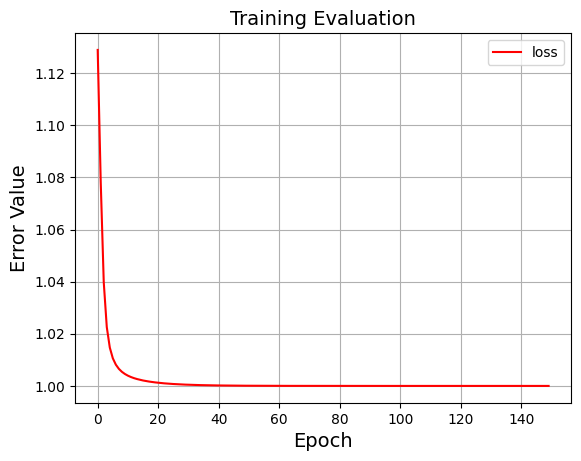

In [ ]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
predictions = model.forward(x_train_oversampled)

predictions = model.encoding(predictions)

print(accuracy_score(y_train_oversampled, predictions))

0.5


In [ ]:
predictions = model.forward(x_test_tensor)

predictions = model.encoding(predictions)

print(accuracy_score(y_test_tensor, predictions))

0.34684563758389264
